In [2]:
%matplotlib inline

In [1]:
import os
import cv2
import json

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from PIL import Image
import scipy.io

import open3d as o3d

In [ ]:
# Define the paths
image_path = "C:/Project Deep Learning/data/SUNRGBD/kv1/b3dodata/img_0063/image/img_0063.jpg"
depth_image_path = "C:/Project Deep Learning/data/SUNRGBD/kv1/b3dodata/img_0063/depth/img_0063_abs.png"
annotation_path = "C:/Project Deep Learning/data/SUNRGBD/kv1/b3dodata/img_0063/annotation/index.json"


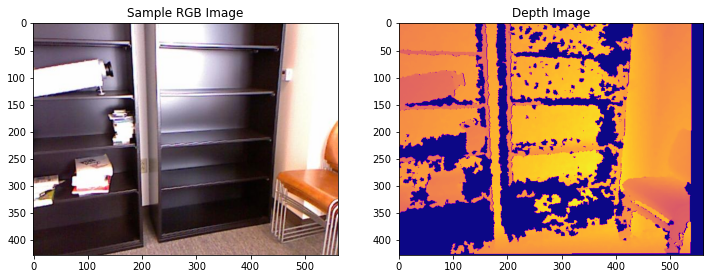

In [7]:
# Load the RGB image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load the depth image
depth_image = cv2.imread(depth_image_path, cv2.IMREAD_UNCHANGED)  # Load in grayscale

# Load the JSON annotation
with open(annotation_path, 'r') as f:
    annotation_data = json.load(f)

# Visualize the RGB image and depth image
plt.figure(figsize=(12, 6))

# RGB image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Sample RGB Image")

# Depth image
plt.subplot(1, 2, 2)
plt.imshow(depth_image, cmap='plasma')
plt.title("Depth Image")

plt.show()


In [16]:
# Dataset path (adjust to your setup)
dataset_path = "C:/Project Deep Learning/data/SUNRGBD"  

# List to store files
rgb_files = []
depth_files = []
annotation_files = []

# Function to collect files recursively
def collect_files(base_path, rgb_ext='.jpg', depth_ext='_depth.png', ann_ext='.json'):
    rgb_files = []
    depth_files = []
    annotation_files = []
    
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.endswith(rgb_ext):
                rgb_files.append(os.path.join(root, file))
            elif file.endswith(depth_ext):
                depth_files.append(os.path.join(root, file))
            elif file.endswith(ann_ext):
                annotation_files.append(os.path.join(root, file))

    return rgb_files, depth_files, annotation_files

# Collect files from all directories
kv1_path = os.path.join(dataset_path, 'kv1')
kv2_path = os.path.join(dataset_path, 'kv2')
realsense_path = os.path.join(dataset_path, 'realsense')
xtion_path = os.path.join(dataset_path, 'xtion')

# Collect files from kv1 and kv2 (including all subfolders)
kv1_rgb, kv1_depth, kv1_annotations = collect_files(kv1_path)
kv2_rgb, kv2_depth, kv2_annotations = collect_files(kv2_path)
realsense_rgb, realsense_depth, realsense_annotations = collect_files(realsense_path)
xtion_rgb, xtion_depth, xtion_annotations = collect_files(xtion_path)


In [11]:
class_names = [
    "wall", "floor", "cabinet", "bed", "chair", "sofa", "table", "door", "window",
    "bookshelf", "picture", "counter", "blinds", "desk", "shelves", "curtain", "dresser",
    "pillow", "mirror", "floor_mat", "clothes", "ceiling", "books", "fridge", "tv", "paper",
    "towel", "shower_curtain", "box", "whiteboard", "person", "night_stand", "toilet", "sink",
    "lamp", "bathtub", "bag"
]

# Example: Get the class name for ID=4 (chair)
print(class_names[4])  # Output: "chair"

chair


In [8]:
# Path to the index.json file
index_json_path = "C:/Project Deep Learning/data/SUNRGBD/kv1/b3dodata/img_0063/annotation/index.json"

# Load the JSON file
with open(index_json_path, "r") as f:
    index_data = json.load(f)

# Print the first few lines to inspect the structure
print(json.dumps(index_data, indent=4)[:1000])  # Print the first 1000 characters

{
    "date": "Sun,15Feb201511:00:00GMT",
    "name": "http://vision.princeton.edu/data/dataset/user/shurans@princeton.edu/SUN-RGBD/b3do/img_0063/annotation/index.json",
    "frames": [
        {
            "polygon": [
                {
                    "x": [
                        477,
                        591,
                        597,
                        573,
                        532,
                        527,
                        452,
                        448,
                        480,
                        468,
                        468,
                        471
                    ],
                    "y": [
                        -37,
                        -36,
                        167,
                        173,
                        173,
                        253,
                        268,
                        115,
                        104,
                        63,
                        63,
                    

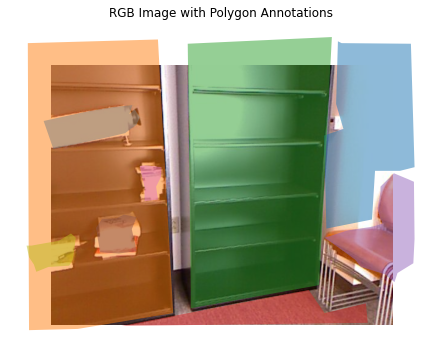

In [9]:
# Paths
base_dir = "C:/Project Deep Learning/data/SUNRGBD/kv1/b3dodata/img_0063"
index_json_path = os.path.join(base_dir, "annotation/index.json")
rgb_path = os.path.join(base_dir, "image/img_0063.jpg")  # Replace with the correct RGB image path

# Load the RGB image
rgb_image = Image.open(rgb_path).convert("RGB")

# Load the index.json file
with open(index_json_path, "r") as f:
    index_data = json.load(f)

# Create a figure
plt.figure(figsize=(10, 5))

# Plot the RGB image
plt.imshow(rgb_image)

# Plot the polygons
for frame in index_data["frames"]:
    for polygon in frame["polygon"]:
        x = polygon["x"]
        y = polygon["y"]
        plt.fill(x, y, alpha=0.5)  # Fill the polygon with transparency

# Add titles and axis labels
plt.title("RGB Image with Polygon Annotations")
plt.axis("off")

# Show the plot
plt.tight_layout()
plt.show()

In [12]:
# Load the segmentation data
seg_path = os.path.join(base_dir, "seg.mat")
seg_data = scipy.io.loadmat(seg_path)

# Print all keys in the loaded .mat file
print("Keys in the .mat file:", seg_data.keys())

Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'seglabel', 'names'])


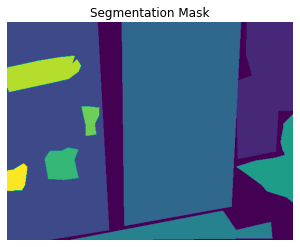

In [13]:
# Load the segmentation data
seg_path = os.path.join(base_dir, "seg.mat")
seg_data = scipy.io.loadmat(seg_path)

# Extract the segmentation mask
seg_mask = seg_data["seglabel"]  # Replace "segmentation" with the correct key

# Visualize the segmentation mask
plt.imshow(seg_mask, cmap="viridis")
plt.title("Segmentation Mask")
plt.axis("off")
plt.show()

In [10]:
# Load the class mapping from seg37list.mat
def load_class_mapping(mapping_file):
    if not os.path.exists(mapping_file):
        raise FileNotFoundError(f"Mapping file not found: {mapping_file}")

    mapping_data = scipy.io.loadmat(mapping_file)

    # Extract 37 class names from 'seg37list'
    class_names = mapping_data.get("seg37list", None)

    if class_names is None:
        raise ValueError("Class mapping file does not contain 'seg37list'!")

    # Convert from nested numpy array to a Python list
    class_names_list = [name[0] for name in class_names[0]]

    return class_names_list

# Load the mapping file
MAPPING_FILE = "C:/Project Deep Learning/data/SUNRGBDtoolbox/Metadata/seg37list.mat"
class_names_37 = load_class_mapping(MAPPING_FILE)

# Print all 37 classes
print("Loaded 37-class mapping:")
for idx, cls in enumerate(class_names_37, start=1):
    print(f"{idx}. {cls}")


Loaded 37-class mapping:
1. wall
2. floor
3. cabinet
4. bed
5. chair
6. sofa
7. table
8. door
9. window
10. bookshelf
11. picture
12. counter
13. blinds
14. desk
15. shelves
16. curtain
17. dresser
18. pillow
19. mirror
20. floor_mat
21. clothes
22. ceiling
23. books
24. fridge
25. tv
26. paper
27. towel
28. shower_curtain
29. box
30. whiteboard
31. person
32. night_stand
33. toilet
34. sink
35. lamp
36. bathtub
37. bag


In [14]:
# Load the segmentation data
seg_path = os.path.join(base_dir, "seg.mat")
seg_data = scipy.io.loadmat(seg_path)

# Extract the segmentation mask
seg_mask = seg_data["seglabel"]  # Replace "segmentation" with the correct key

# Print the shape and unique values in the mask
print("Segmentation mask shape:", seg_mask.shape)
print("Unique values in mask:", np.unique(seg_mask))

Segmentation mask shape: (427, 561)
Unique values in mask: [0 1 2 3 4 5 6 7 8 9]


RGB image: C:/Project Deep Learning/data/SUNRGBD/kv2/kinect2data/000065_2014-05-16_20-14-38_260595134347_rgbf000121-resize/image/0000121.jpg, Mapped classes: ['background', 'wall', 'floor', 'cabinet', 'chair', 'table', 'door', 'window', 'picture', 'curtain', 'paper', 'lamp', 'bag']


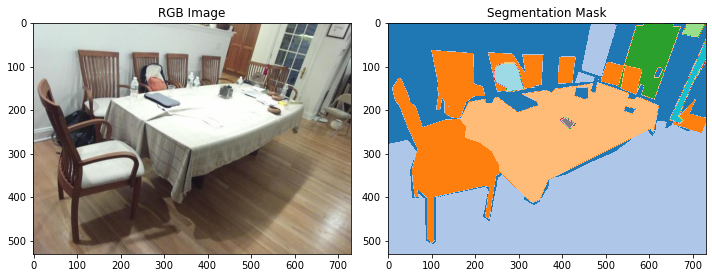

RGB image: C:/Project Deep Learning/data/SUNRGBD/kv2/kinect2data/000066_2014-04-13_23-39-40_094959634447_rgbf000225-resize/image/0000225.jpg, Mapped classes: ['background', 'wall', 'floor', 'door', 'bookshelf']


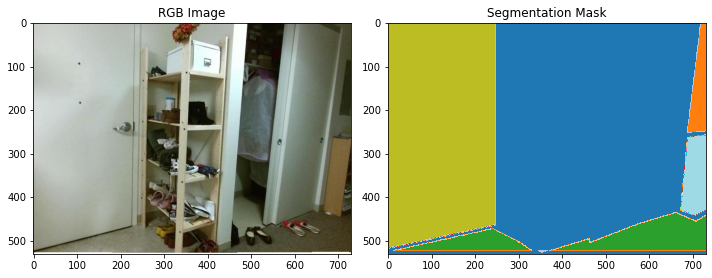

RGB image: C:/Project Deep Learning/data/SUNRGBD/kv2/kinect2data/000067_2014-04-13_23-40-52_094959634447_rgbf000225-resize/image/0000225.jpg, Mapped classes: ['background', 'wall', 'floor', 'cabinet', 'door', 'towel', 'box', 'sink', 'bathtub', 'bag']


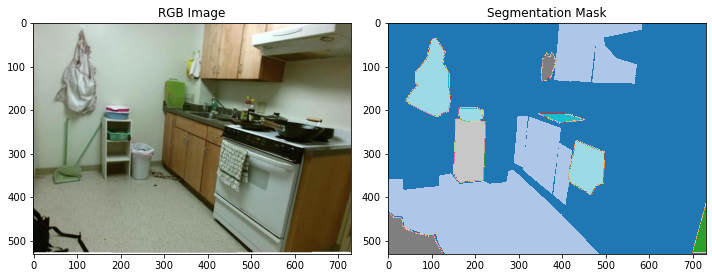

RGB image: C:/Project Deep Learning/data/SUNRGBD/kv2/kinect2data/000068_2014-04-13_23-56-57_094959634447_rgbf000182-resize/image/0000182.jpg, Mapped classes: ['background', 'wall', 'floor', 'sink']


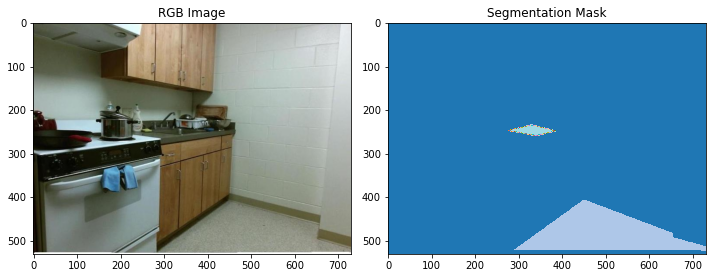

RGB image: C:/Project Deep Learning/data/SUNRGBD/kv2/kinect2data/000069_2014-04-13_23-58-49_094959634447_rgbf000224-resize/image/0000224.jpg, Mapped classes: ['background', 'wall', 'cabinet', 'counter', 'fridge', 'paper', 'box', 'bag']


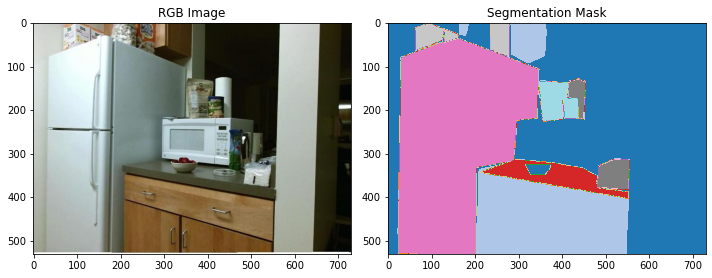

In [15]:
# Paths
base_dir = "C:/Project Deep Learning/data/"
labels_dir = "C:/Project Deep Learning/data/labels_37"  # Path to the folder with masked PNGs
csv_path = "C:/Project Deep Learning/data/splits/annotations.csv"  # Path to the CSV file mapping RGB to label files

# Load the class mapping (same as previous)
def load_class_mapping(mapping_file):
    mapping_data = scipy.io.loadmat(mapping_file)
    class_names = mapping_data.get("seg37list", None)
    if class_names is None:
        raise ValueError("Class mapping file does not contain 'seg37list'!")
    class_names_list = [name[0] for name in class_names[0]]
    return class_names_list

# Load class names mapping
MAPPING_FILE = "C:/Project Deep Learning/data/SUNRGBDtoolbox/Metadata/seg37list.mat"
class_names_37 = load_class_mapping(MAPPING_FILE)

# Load CSV file that maps RGB image files to label images (segmentation masks)
df = pd.read_csv(csv_path)

# Process only the first 5 rows
for idx, row in df.head(5).iterrows():  # Use head(5) to limit to 5 rows
    rgb_image_path = os.path.join(base_dir, row['image'])  # Update with correct column name
    label_image_path = os.path.join(labels_dir, row['label'])  # Update with correct column name
    
    # Load the RGB image
    rgb_image = Image.open(rgb_image_path).convert("RGB")
    
    # Load the label image (segmentation mask)
    label_image = Image.open(label_image_path)
    
    # Convert label image to numpy array for easier processing
    label_array = np.array(label_image)
    
    # Optionally, map label values to class names
    mapped_labels = [class_names_37[value - 1] if value != 0 else "background" for value in np.unique(label_array)]
    print(f"RGB image: {rgb_image_path}, Mapped classes: {mapped_labels}")
    
    # You can also visualize the RGB image and the label mask side by side if needed
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(rgb_image)
    ax[0].set_title("RGB Image")
    ax[1].imshow(label_array, cmap="tab20")  # Or use a custom color map for segmentation visualization
    ax[1].set_title("Segmentation Mask")
    plt.tight_layout()
    plt.show()


In [6]:
import numpy as np
import cv2
import os

# === LOAD DATA ===
depth_path = "C:/Project Deep Learning/data/SUNRGBD/kv1/b3dodata/img_0063/depth/img_0063_abs.png"
rgb_path = "C:/Project Deep Learning/data/SUNRGBD/kv1/b3dodata/img_0063/image/img_0063.jpg"
intrinsics_path = "C:/Project Deep Learning/data/SUNRGBD/kv1/b3dodata/img_0063/intrinsics.txt"

# Load depth image
depth_img = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED)
depth_meters = depth_img.astype(np.float32) / 1000.0  # Convert to meters

# Load RGB image
rgb_img = cv2.imread(rgb_path)
rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)

# Load Camera Intrinsics (Proper Matrix)
intrinsics = np.loadtxt(intrinsics_path)  # Load as a 3×3 matrix

# Extract fx, fy, cx, cy correctly
fx = intrinsics[0, 0]  # Focal length in x
fy = intrinsics[1, 1]  # Focal length in y
cx = intrinsics[0, 2]  # Principal point x
cy = intrinsics[1, 2]  # Principal point y

# Define Open3D Camera Intrinsics
intrinsic = o3d.camera.PinholeCameraIntrinsic(
    width=depth_img.shape[1], 
    height=depth_img.shape[0], 
    fx=fx, fy=fy, cx=cx, cy=cy
)

# Convert to Open3D images
depth_o3d = o3d.geometry.Image(depth_meters)
rgb_o3d = o3d.geometry.Image(rgb_img)
rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(rgb_o3d, depth_o3d)

# Create 3D Point Cloud
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd, intrinsic)

# Flip coordinate system for correct visualization
pcd.transform([[1, 0, 0, 0], 
               [0, -1, 0, 0], 
               [0, 0, -1, 0], 
               [0, 0, 0, 1]])

# Save & visualize
o3d.io.write_point_cloud("C:/Project Deep Learning/outputs/room.ply", pcd)
o3d.visualization.draw_geometries([pcd])


In [4]:
depth_meters = cv2.bilateralFilter(depth_meters, d=5, sigmaColor=75, sigmaSpace=75)

In [5]:
print("Intrinsic Matrix:\n", intrinsics)


Intrinsic Matrix:
 [[520.532    0.     277.9258]
 [  0.     520.7444 215.115 ]
 [  0.       0.       1.    ]]


## Split the Dataset into Training and Validation Sets


In [ ]:
# Load the CSV file
df = pd.read_csv("C:/Project Deep Learning/data/splits/annotations.csv")

# First, split the data into 80% for training and 20% for validation+test
train_data, temp_data = train_test_split(df, test_size=0.2, random_state=42)

# Then, split the temp_data (which contains validation and test) into 50% validation and 50% test
valid_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Save the subsets as CSVs if needed
train_data.to_csv("C:/Project Deep Learning/data/splits/train_split.csv", index=False)
valid_data.to_csv("C:/Project Deep Learning/data/splits/valid_split.csv", index=False)
test_data.to_csv("C:/Project Deep Learning/data/splits/test_split.csv", index=False)

# Now you have:
# - train_data for training the model
# - valid_data for validating the model during training
# - test_data for evaluating the model after training
